<a href="https://colab.research.google.com/github/revanks/Xeeva_Task_Files/blob/main/Task_2_Topic_Modeling_TFIDF_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Task - 2.	Text based clustering (NLP) : Unsupervised topic modelling of unlabeled text descriptions with TF-IDF and K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
data=files.upload()

Saving bert_sample.xlsx to bert_sample.xlsx


In [16]:
df=pd.read_excel('bert_sample.xlsx')
df=pd.DataFrame(df)
df.head()

,ITEM_NAME,CATEGORY_ID
0,CALIBRACION TRANSDUCER 75 nm,CAPITAL ASSEMBLY
1,for pusher whskey,CAPITAL ASSEMBLY
2,Stat 40B Press Head Cup to Carrier from Stati...,CAPITAL ASSEMBLY
3,TRANSD. Cable (4145097103) scrw,CAPITAL ASSEMBLY
4,"ZT200 7,5BAR,13BAR60HZ NUMERO DE SERIE: AIF09...",CAPITAL ASSEMBLY


## Preprocessing and Cleaning data

In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text



In [19]:
df['ITEM_NAME'] = df['ITEM_NAME'].apply(clean_text)
df.head()

,ITEM_NAME,CATEGORY_ID
0,calibracion transducer 75 nm,CAPITAL ASSEMBLY
1,pusher whskey,CAPITAL ASSEMBLY
2,stat 40b press head cup carrier stations k2 t1...,CAPITAL ASSEMBLY
3,transd cable 4145097103 scrw,CAPITAL ASSEMBLY
4,zt200 7 5bar 13bar60hz numero de serie aif0944...,CAPITAL ASSEMBLY


# TF-IDF and K-Means Clustering

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
documents = df['ITEM_NAME'].values.astype("U")

In [29]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)
k = 4
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)
df['cluster'] = model.labels_
df.head()

,ITEM_NAME,CATEGORY_ID,cluster
0,calibracion transducer 75 nm,CAPITAL ASSEMBLY,0
1,pusher whskey,CAPITAL ASSEMBLY,0
2,stat 40b press head cup carrier stations k2 t1...,CAPITAL ASSEMBLY,0
3,transd cable 4145097103 scrw,CAPITAL ASSEMBLY,0
4,zt200 7 5bar 13bar60hz numero de serie aif0944...,CAPITAL ASSEMBLY,0


In [30]:
clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['ITEM_NAME','CATEGORY_ID']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 drill
 tools
 repair
 bar
 carbide
 boring
 maher
 para
 drum
 end
------------
Cluster 1:
 insert
 serial
 print
 engrave
 make
 new
 trim
 1162l
 punch
 coin
------------
Cluster 2:
 desc
 type
 mfg
 bol
 pn
 ref
 block
 ptu
 d2
 calvek
------------
Cluster 3:
 10
 chevron
 rando
 tank
 drum
 55
 meropa
 17
 460
 starple
------------


#Cluster Visulization

In [36]:
from sklearn.preprocessing import normalize
tf_idf_norm = normalize(features)
tf_idf_array = tf_idf_norm.toarray()

CPU times: user 148 ms, sys: 118 ms, total: 266 ms
Wall time: 143 ms


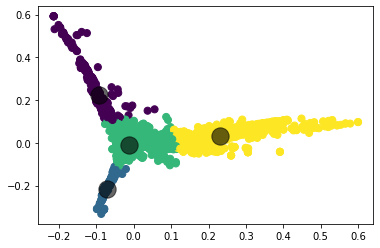

In [38]:
from sklearn.cluster import KMeans
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

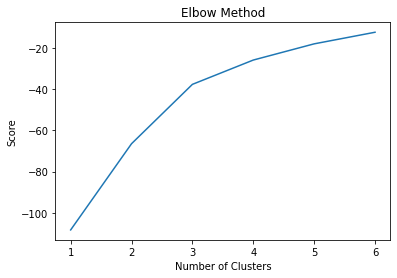

In [39]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()